In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
!pip install opencv-python tensorflow==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: gast
    Found existing installa

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [37]:
#load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded successfully')

/usr/local/lib/python3.8/dist-packages/keras/layers/core/lambda_layer.py:324: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


model loaded successfully


In [38]:
path = './test_images/N50.jpeg'
image = load_img(path)
image = np.array(image, dtype=np.uint8)
image1 = load_img(path, target_size=(224,224))
img_arr_224 = img_to_array(image1)/255.0

In [39]:
h, w, d = image.shape
print('height of image is ', h)
print('width of image is ', w)

height of image is  333
width of image is  500


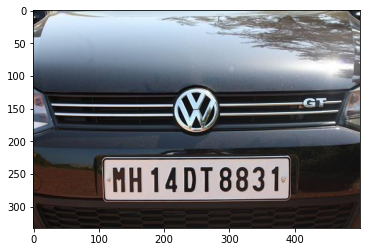

In [40]:
plt.imshow(image)
plt.show()

In [41]:
test_arr = img_arr_224.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [42]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 6s 6s/step


array([[0.19930294, 0.7911349 , 0.6661441 , 0.8730676 ]], dtype=float32)

In [43]:
#denormalize the values
denorm = np.array([w, w, h,h])
coords = coords * denorm
coords

array([[ 99.65147078, 395.56744695, 221.82597631, 290.7315166 ]])

In [44]:
coords = coords.astype(np.int32)

In [45]:
coords

array([[ 99, 395, 221, 290]], dtype=int32)

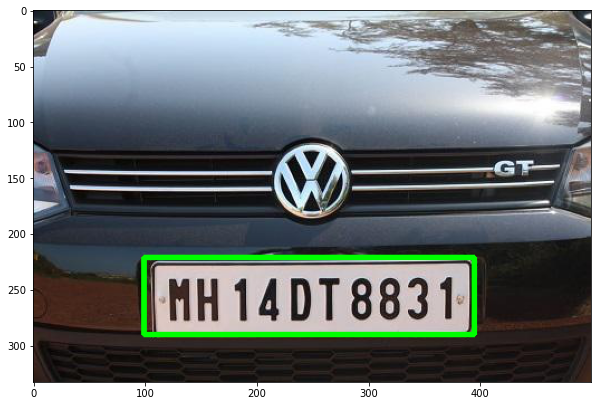

In [46]:
#drawing bounding box on top of images
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
cv2.rectangle(image, pt1, pt2, (0,255,0), 3)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [55]:
def object_detection(path):
  image = load_img(path)
  image = np.array(image, dtype=np.uint8)
  image1 = load_img(path, target_size=(224,224))
  img_arr_224 = img_to_array(image1)/255.0
  h, w, d = image.shape
  test_arr = img_arr_224.reshape(1, 224, 224, 3)
  test_arr.shape
  #make prediction
  coords = model.predict(test_arr)

  #denormalize the values
  denorm = np.array([w, w, h,h])
  coords = coords * denorm

  #draw bounding box on the top of image
  coords = coords.astype(np.int32)


  xmin, xmax, ymin, ymax = coords[0]
  pt1 = (xmin, ymin)
  pt2 = (xmax, ymax)
  print(pt1, pt2)
  cv2.rectangle(image, pt1, pt2, (0,255,0), 3)
  return image, coords


1/1 [==============================] - 0s 331ms/step
(393, 340) (511, 369)


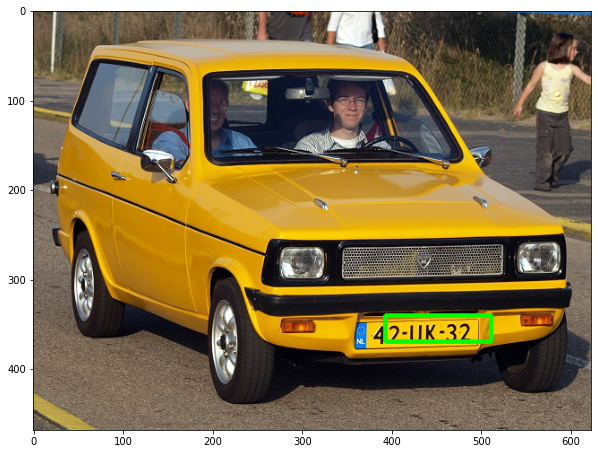

In [58]:
path = './test_images/N22.jpg'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [60]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [69]:
import pytesseract


In [70]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [71]:
import pytesseract as pt


1/1 [==============================] - 0s 349ms/step
(99, 221) (395, 290)


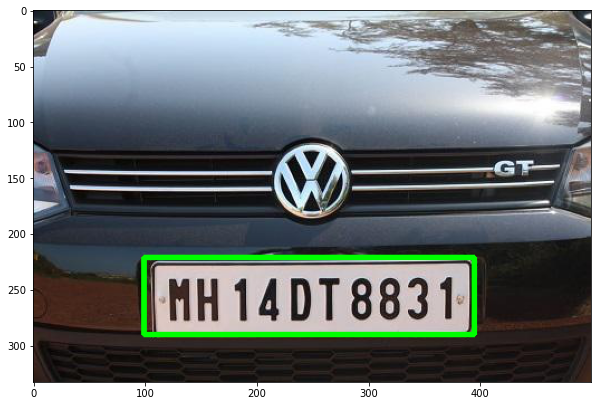

In [63]:
path = './test_images/N50.jpeg'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


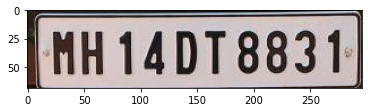

In [65]:
img = np.array(load_img(path))
xmin, xmax, ymin, tmax = cods[0]
roi = img[ymin:ymax, xmin:xmax]
plt.imshow(roi)
plt.show()

In [72]:
#extract text from image
pt.image_to_string(roi)

'[MH 14078831,\n\x0c'